Random Forest algorithm for Machine Failure estimation

In [38]:
import pandas as pd

df = pd.read_csv('Data/workdata.csv')
df = df.iloc[:, 2:-5]  # Disregard the first two and the last five columns which are noise
#df = df.iloc[:,6]
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,L,298.9,309.1,2861,4.6,143,1
1,L,298.9,309.0,1410,65.7,191,1
2,L,298.8,308.9,1455,41.3,208,1
3,L,298.4,308.2,1282,60.7,216,1
4,L,298.3,308.1,1412,52.3,218,1


In [39]:
df['Machine failure'].value_counts()

Machine failure
0    1200
1     339
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

x = df.drop(['Type','Machine failure'], axis=1) # Disregard the machine failure column
y = df['Machine failure']  # The target variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

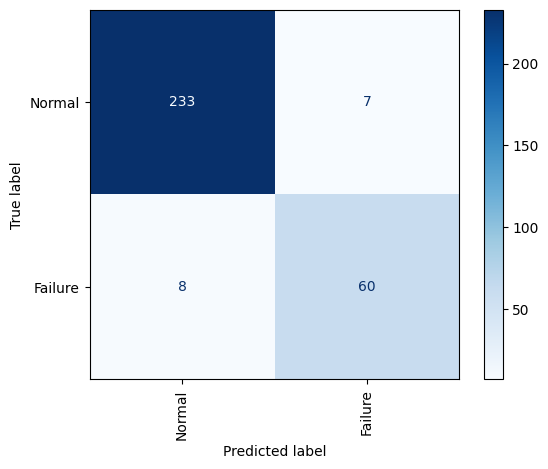

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay as cmd




rf_model = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
rf_model.fit(X_train, y_train)



labels = ['Normal', 'Failure']
cmd.from_estimator(rf_model, X_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

In [42]:
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9512987012987013
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       240
           1       0.90      0.88      0.89        68

    accuracy                           0.95       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.95      0.95      0.95       308



In [ ]:
from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'n_estimators': [75, 100, 150],
#    'max_depth': [None, 10, 20],
#    'min_samples_split': [None, 2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'criterion': ['gini', 'entropy'],
#    'max_features': ['sqrt', None]
#}

#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='recall')
#grid_search.fit(X_train, y_train)

#print(f"Best Parameters: {grid_search.best_params_}")

After the grid search the "Ideal parameters"  

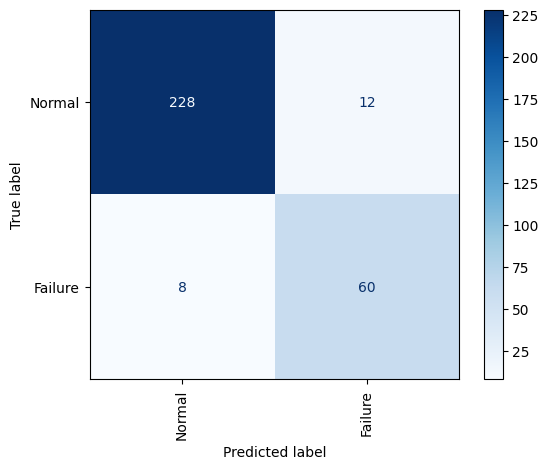

In [186]:
rf_model = RandomForestClassifier(max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, class_weight={0: 1, 1: 4}, random_state=42)
rf_model.fit(X_train, y_train)



labels = ['Normal', 'Failure']
cmd.from_estimator(rf_model, X_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

Accuracy: 0.8928571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       240
           1       0.68      0.97      0.80        68

    accuracy                           0.89       308
   macro avg       0.84      0.92      0.86       308
weighted avg       0.92      0.89      0.90       308



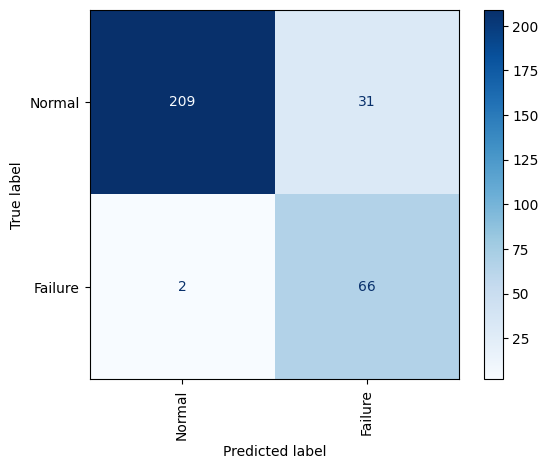

In [193]:
#rf_model = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
#rf_model.fit(X_train, y_train)

proba = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.1
y_pred = (proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cmd.from_predictions(y_test, y_pred, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

As we can see we achieve a decent result with random forest, especially when the custom threshold is placed on the system achieving 0.96 recall on machine failure

Lets try with Logistic regression and see if that performs better

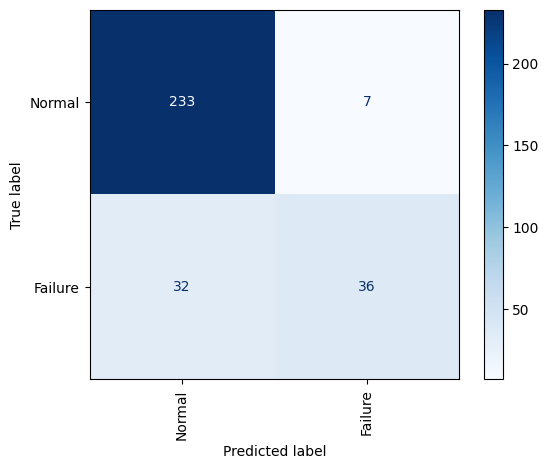

In [125]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

cmd.from_estimator(lr_model, X_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced',  {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 6}, {0: 1, 1: 8}, {0: 1, 1: 10}],
}

# Use recall as the scoring metric
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    scoring='recall',
    cv=5
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Accuracy: 0.7435064935064936
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.81       240
           1       0.46      0.96      0.62        68

    accuracy                           0.74       308
   macro avg       0.72      0.82      0.71       308
weighted avg       0.87      0.74      0.77       308



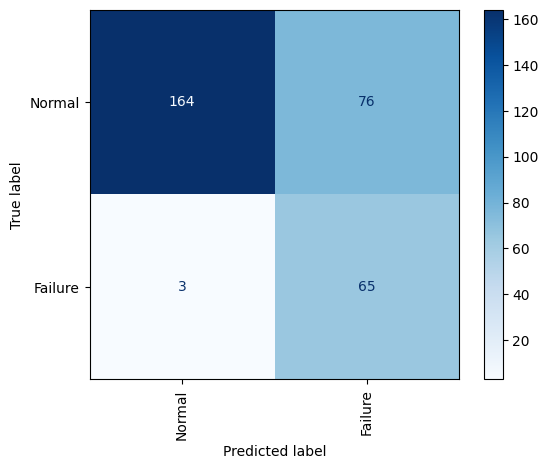

In [198]:
lr_model = LogisticRegression(random_state=42, C=0.1, class_weight={0: 1, 1: 10})
lr_model.fit(X_train, y_train)

cmd.from_estimator(lr_model, X_test, y_test, display_labels=labels, cmap='Blues', xticks_rotation='vertical')


# Evaluate the model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7597402597402597
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82       240
           1       0.48      0.94      0.63        68

    accuracy                           0.76       308
   macro avg       0.73      0.82      0.73       308
weighted avg       0.87      0.76      0.78       308



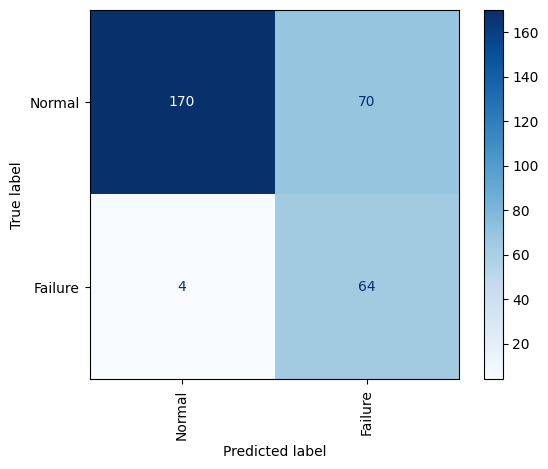

In [189]:
lr_model = LogisticRegression(random_state=42, C=0.1)
lr_model.fit(X_train, y_train)

proba = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
threshold = 0.1
predictions = (proba >= threshold).astype(int)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, predictions))

cmd.from_predictions(y_test, predictions, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

